<a href="https://colab.research.google.com/github/Gabriel-Rangel/Data-Finance/blob/main/estudos_correlacao_DOLxIBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

import yfinance as yf
yf.pdr_override()

In [ ]:
#selecionando tickers de interesse
tickers = ['^BVSP', 'USDBRL=X']
#pegando dados apartir de 2007 pois não temos dados anteriores para dólar e apenas pegando preço de fechamento para análise
carteira = web.get_data_yahoo(tickers, start='2007-01-01')['Close']
carteira

In [ ]:
#retirando campos NaN para limpar dados
carteira = carteira.dropna()
carteira

In [ ]:
#apenas renomeando colunas
carteira.columns = ['Dolar', 'IBOV']
carteira

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcb16f40d0>,
      dtype=object)

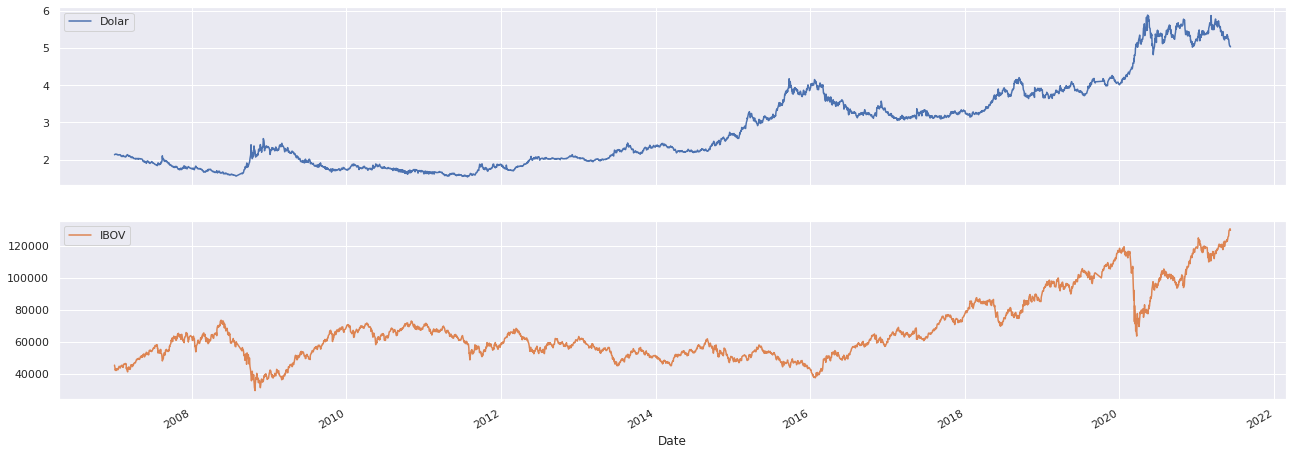

In [ ]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

Text(0.5, 1.0, 'Gráfico de dispersão Dol x Ibov')

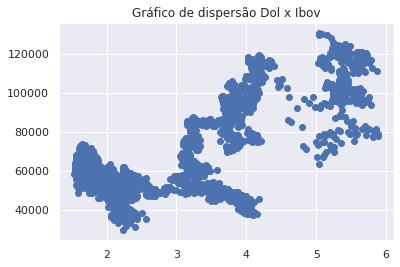

In [ ]:
plt.scatter(carteira['Dolar'],carteira['IBOV'])
plt.title('Gráfico de dispersão Dol x Ibov')

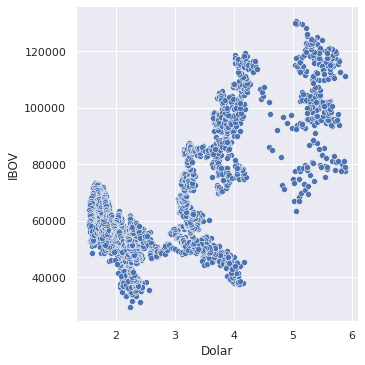

In [ ]:
sns.relplot(x = 'Dolar', y = 'IBOV', data=carteira)

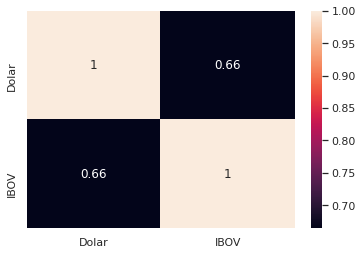

In [ ]:
sns.heatmap(carteira.corr(), annot=True)

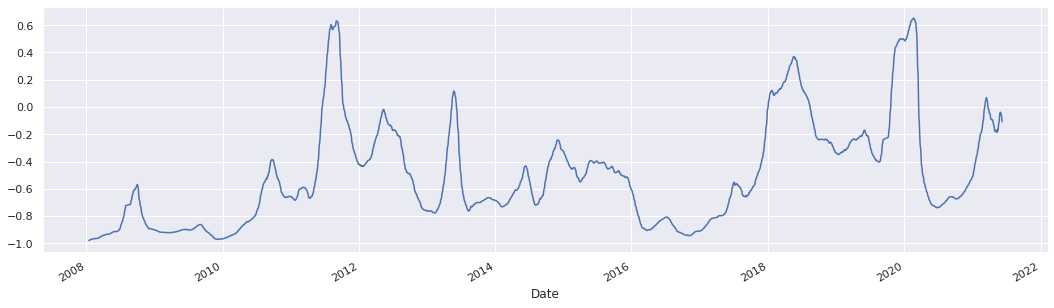

In [ ]:
#"ANUALIZANDO" (rooling(252)) relação entre dolar e ibov
carteira['Dolar'].rolling(252).corr(carteira['IBOV']).plot(figsize=(18,5))

# **Primeiras Conclusões**


1. Existe certa relação entre dólar e ibov, quando há fortes quedas do IBOV, Dolar Sobe, ou relação pode ser oposta tbm.

2. Coef de relação = 0,66

3. Essa correlação varia ao longo muito no tempo, portanto não é uma correlação válida/confiável



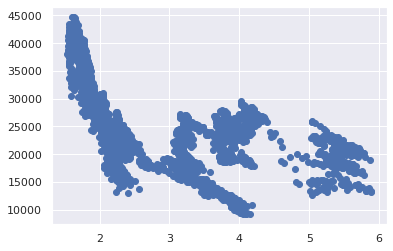

In [39]:
#criando uma coluna IBOV_DOLARIZADO, talvez seja melhor fazer essa correlação.
carteira['IBOV_DOLARIZADO'] = carteira['IBOV']/carteira['Dolar']

plt.scatter(carteira['Dolar'],carteira['IBOV_DOLARIZADO'])

#rapidamente olhando para o gráfico podemos verificar que essa hipotése não se satisfaz